In [143]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/세미나/23.11.21/data/data_norm.xlsx")

data_main


data=pd.read_excel("/Users/withmocha/Desktop/TEED/세미나/23.11.21/data/data_drop.xlsx")

In [144]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,0.842105,0.684783,0.681818,0.56
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [145]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",FSR DATA_B(Right),FSR DATA_C(Left)
0,0,0.705263,0.706522,0.772727,0.68
1,1,0.715789,0.714674,0.727273,0.66
2,2,0.747368,0.747283,0.727273,0.64
3,3,0.768421,0.709239,0.681818,0.58
4,4,NaN,NaN,NaN,NaN
...,...,...,...,...,...
608,608,0.505263,0.929348,0.363636,0.62
609,609,0.242105,0.910326,0.409091,0.64
610,610,0.473684,0.918478,0.500000,0.62
611,611,0.400000,0.891304,0.636364,0.56


In [146]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

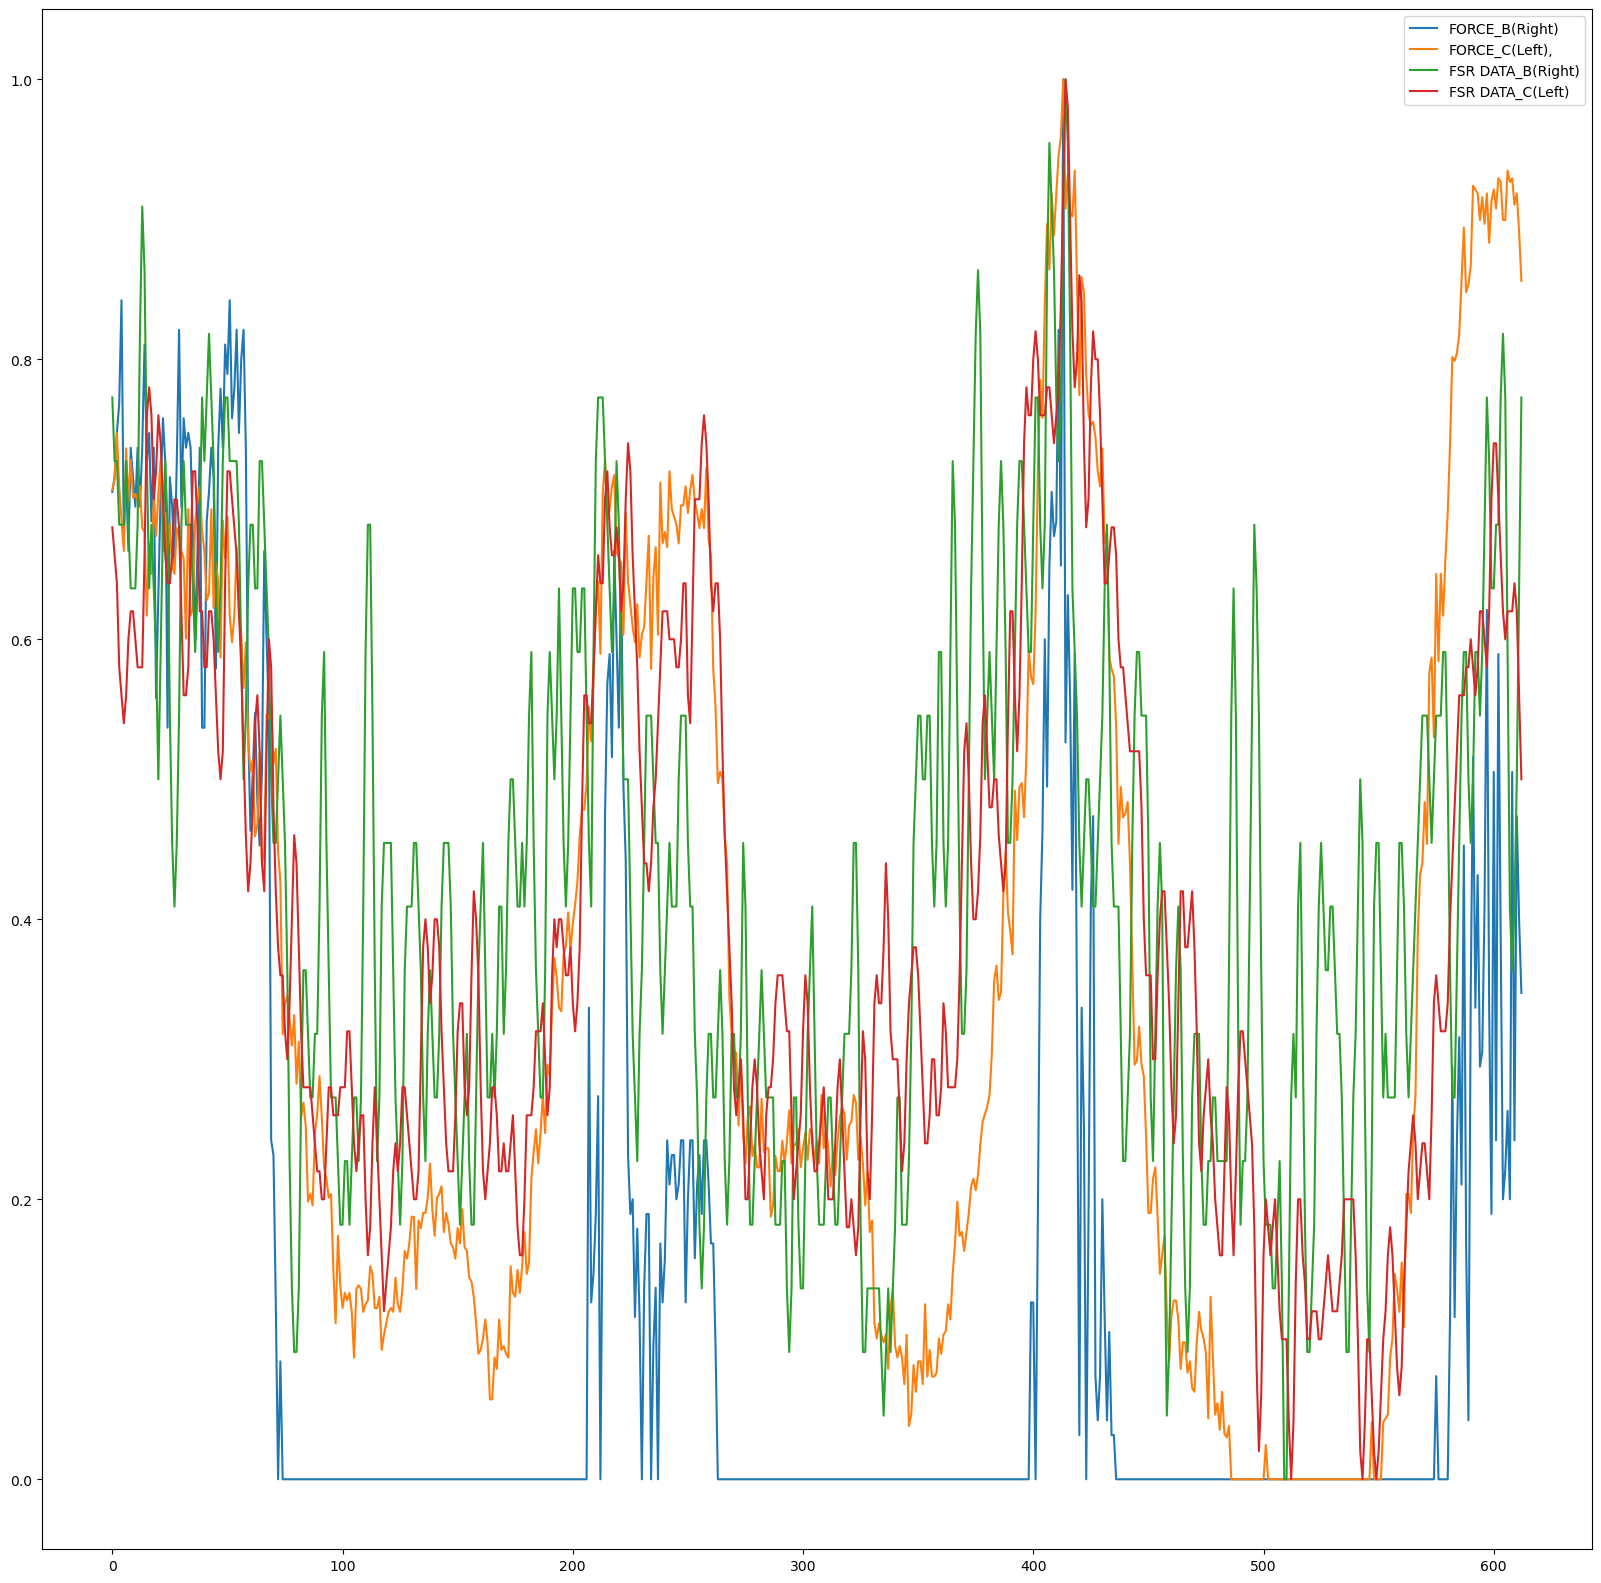

In [147]:
data_main.plot(figsize=(20,20))

<Axes: >

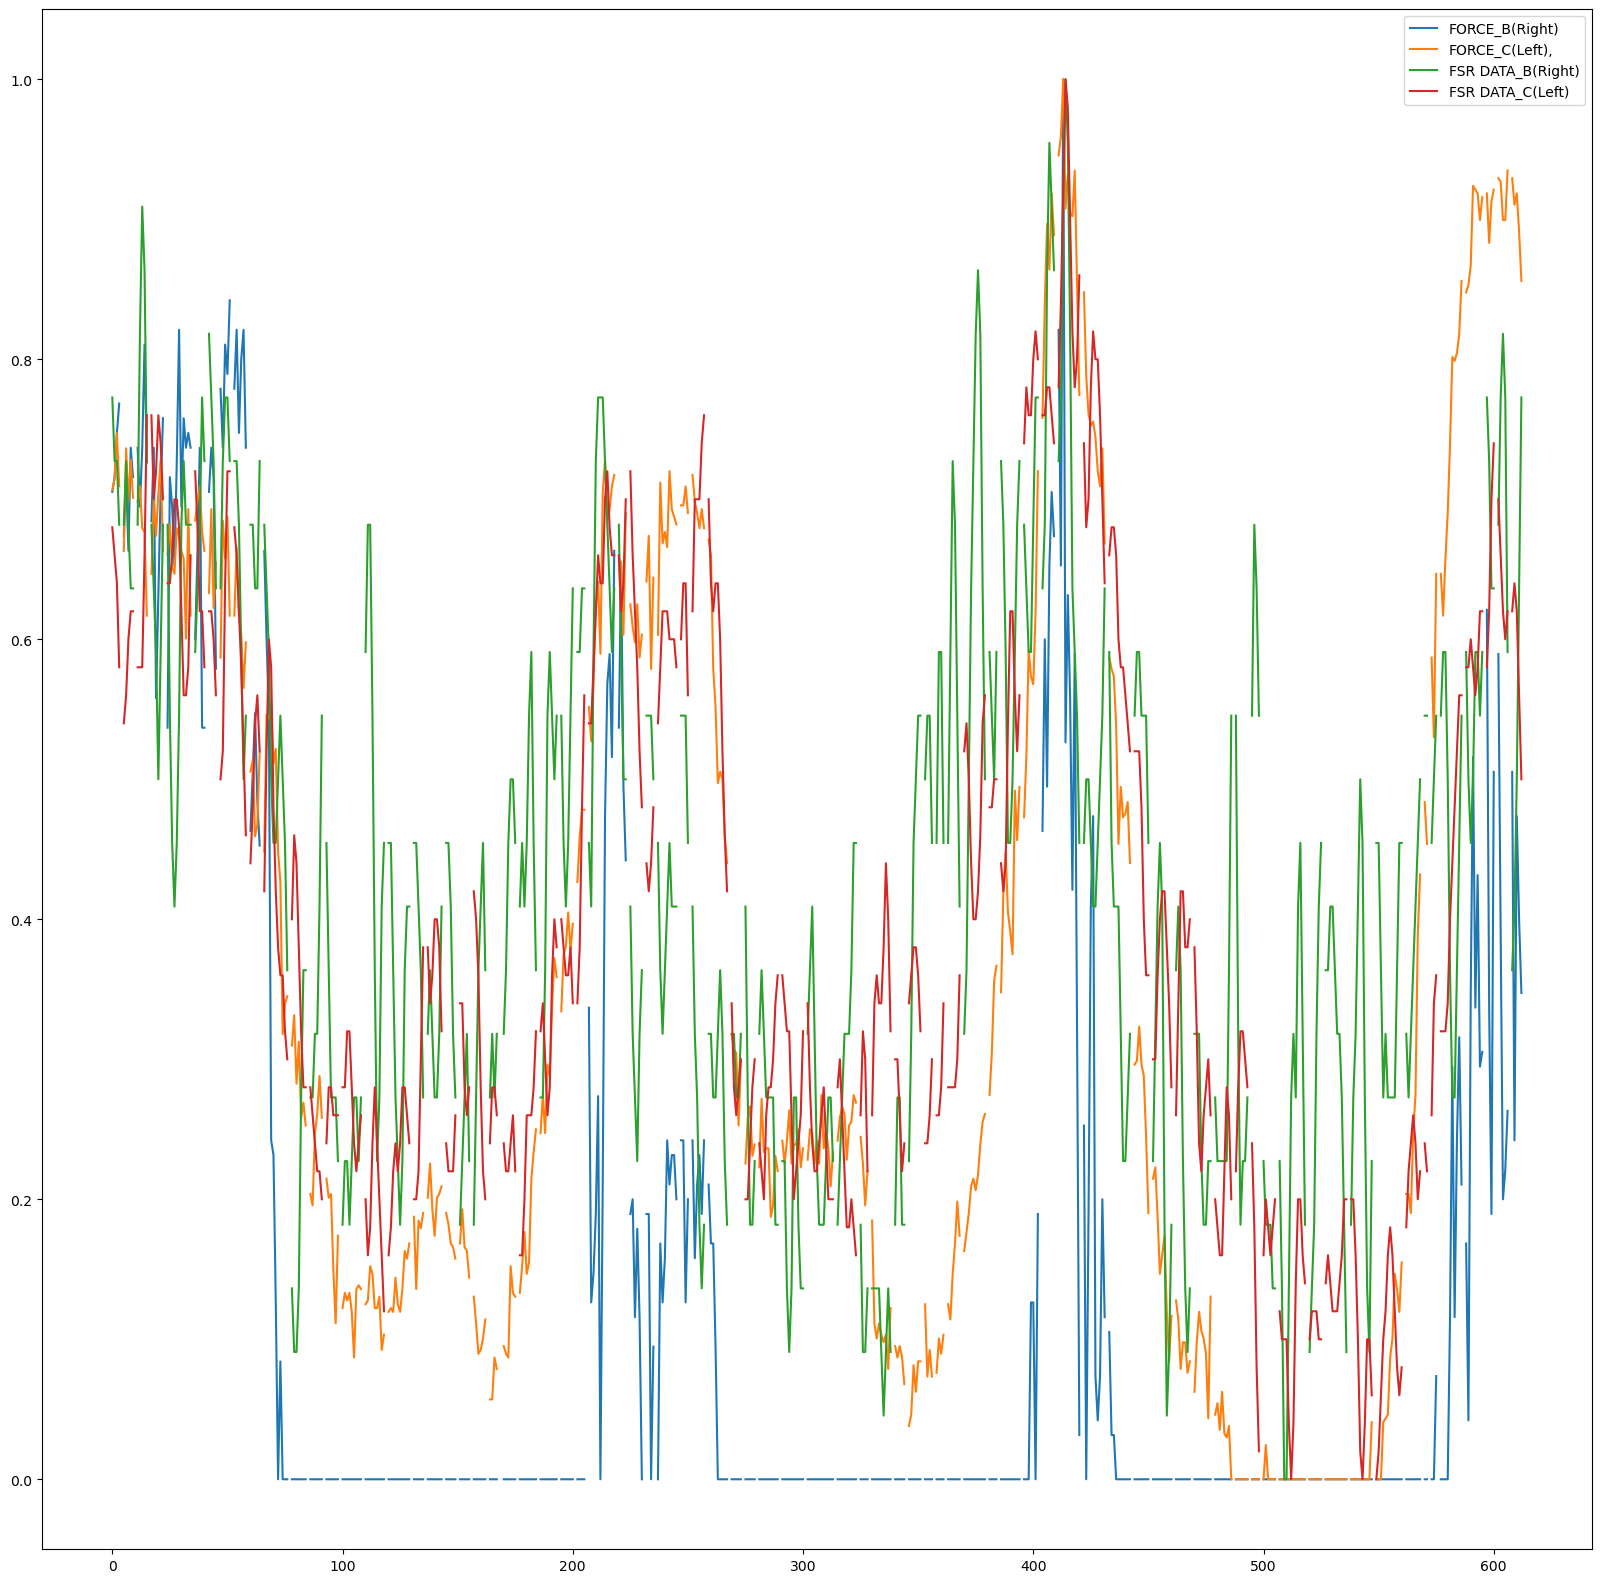

In [148]:
data.plot(figsize=(20,20))

In [149]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)       78
FORCE_C(Left),       78
FSR DATA_B(Right)    78
FSR DATA_C(Left)     78
dtype: int64
FORCE_B(Right)       0
FORCE_C(Left),       0
FSR DATA_B(Right)    0
FSR DATA_C(Left)     0
dtype: int64


FORCE_B(Right)


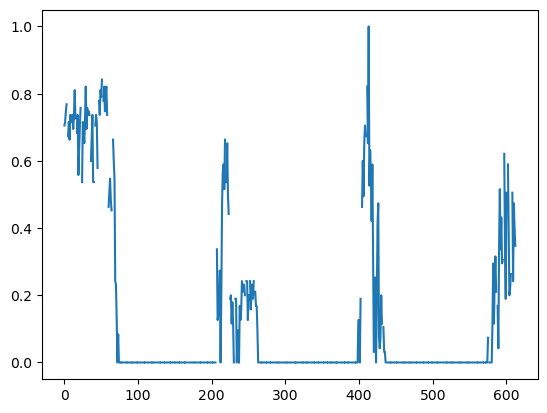

FORCE_C(Left),


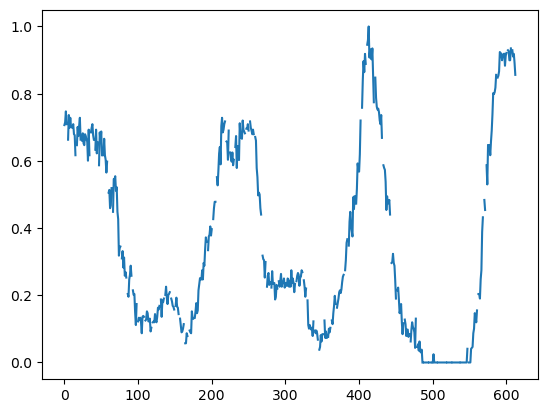

FSR DATA_B(Right)


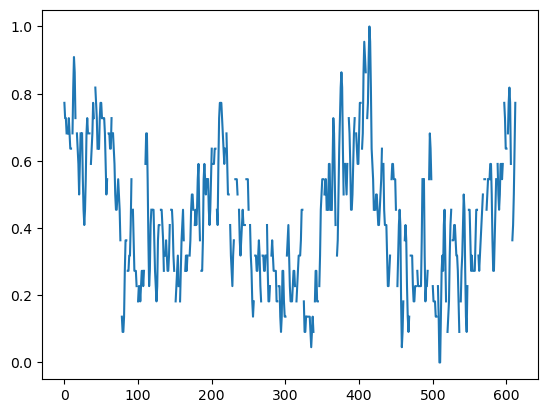

FSR DATA_C(Left)


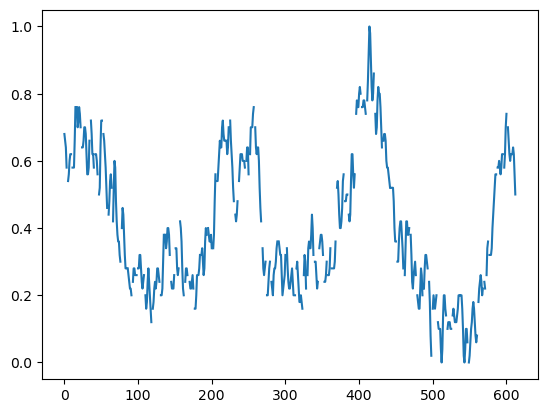

In [150]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [151]:
## R_FORCE_B : L_FORCE_C
## R_FORCE_B : L_FSR_C : 

In [152]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)","FSR DATA_B(Right)"],inplace=True)




In [153]:
data_sca.columns

Index(['FORCE_C(Left),', 'FSR DATA_C(Left)'], dtype='object')

In [154]:
from sklearn.preprocessing import MinMaxScaler

data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.03/data_target.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]


In [155]:
data.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [156]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','FSR DATA_C(Left)']]

<Axes: >

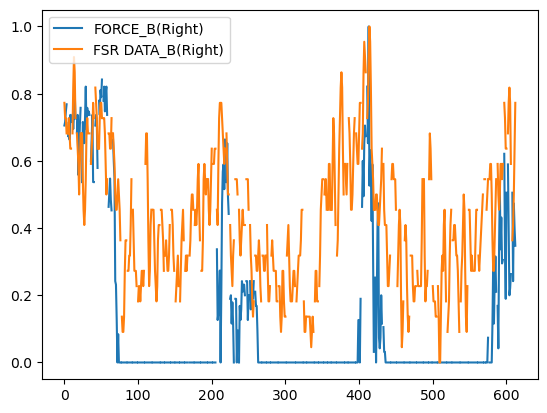

In [157]:
R.plot()

<Axes: >

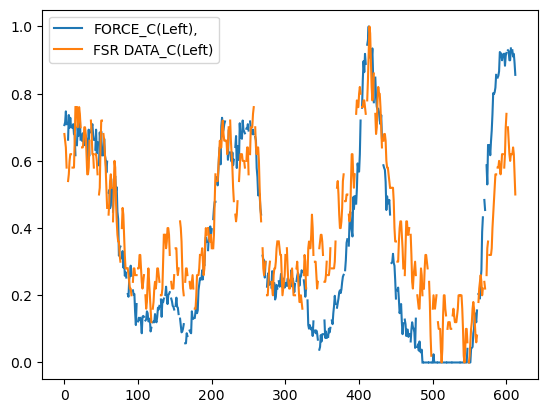

In [158]:
L.plot()

In [159]:
import numpy as np

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]

normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)

In [160]:
index=L.index

loss_index_L_FORECE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FSR_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORECE_C=np.setdiff1d(index,loss_index_L_FORECE_C)
normal_index_L_FSR_C=np.setdiff1d(index,loss_index_L_FSR_C)

In [161]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [162]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_L_FORECE_C=L.iloc[normal_index_L_FORECE_C,0]
x_test_L_FORECE_C=loss_index_L_FORECE_C

y_train_L_FSR_C=L.iloc[normal_index_L_FORECE_C,1]
x_test_L_FSR_C=loss_index_L_FSR_C

L_FORCE_C=L.iloc[:,0].copy()
L_FSR_C=L.iloc[:,1].copy()

In [163]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1)
(535,)


In [164]:
x_train_R_FORECE_B=x_train_R_FORECE_B.reshape(x_train_R_FORECE_B.shape[0],x_train_R_FORECE_B.shape[1],1)
x_test_L_FORECE_C=x_test_L_FORECE_C.reshape(x_test_L_FORECE_C.shape[0],x_test_L_FORECE_C.shape[1],1)
x_test_L_FSR_C=x_test_L_FSR_C.reshape(x_test_L_FSR_C.shape[0],x_test_L_FSR_C.shape[1],1)

In [165]:
print(x_train_R_FORECE_B.shape)
print(y_train_L_FORECE_C.shape)

(535, 1, 1)
(535,)


In [166]:
#[I 2023-11-12 16:09:08,283] Trial 19 finished with value: 0.1462244140386311 and parameters: {'batch_size': 102, 'steps_per_epoch': 10, 'epochs': 4758, 'filter': 172, 'lstm_par': 179, 'dense_par': 288}. Best is trial 19 with value: 0.1462244140386311.
#{'batch_size': 102, 'steps_per_epoch': 10, 'epochs': 4758, 'filter': 172, 'lstm_par': 179, 'dense_par': 288}

In [167]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model = Sequential()
model.add(LSTM(179, activation='relu', input_shape=(x_train_R_FORECE_B.shape[1], 1)))
model.add(Dense(288, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 339)               462396    
                                                                 
 dense_8 (Dense)             (None, 199)               67660     
                                                                 
Total params: 530,056
Trainable params: 530,056
Non-trainable params: 0
_________________________________________________________________


In [168]:
model.fit(x_train_R_FORECE_B,y_train_L_FORECE_C,epochs=4758,verbose=2,batch_size=102,steps_per_epoch=10)
pred=model.predict(x_test_L_FORECE_C)
pred=pred.reshape(-1,1)

Epoch 1/6992


3/3 - 1s - loss: 18.7395 - 670ms/epoch - 223ms/step
Epoch 2/6992
3/3 - 0s - loss: 8.9336 - 11ms/epoch - 4ms/step
Epoch 3/6992
3/3 - 0s - loss: 4.5628 - 11ms/epoch - 4ms/step
Epoch 4/6992
3/3 - 0s - loss: 1.9001 - 12ms/epoch - 4ms/step
Epoch 5/6992
3/3 - 0s - loss: 1.1932 - 12ms/epoch - 4ms/step
Epoch 6/6992
3/3 - 0s - loss: 0.8762 - 11ms/epoch - 4ms/step
Epoch 7/6992
3/3 - 0s - loss: 0.5373 - 22ms/epoch - 7ms/step
Epoch 8/6992
3/3 - 0s - loss: 0.4095 - 21ms/epoch - 7ms/step
Epoch 9/6992
3/3 - 0s - loss: 0.3484 - 18ms/epoch - 6ms/step
Epoch 10/6992
3/3 - 0s - loss: 0.2541 - 21ms/epoch - 7ms/step
Epoch 11/6992
3/3 - 0s - loss: 0.2491 - 22ms/epoch - 7ms/step
Epoch 12/6992
3/3 - 0s - loss: 0.2002 - 17ms/epoch - 6ms/step
Epoch 13/6992
3/3 - 0s - loss: 0.1530 - 13ms/epoch - 4ms/step
Epoch 14/6992
3/3 - 0s - loss: 0.1395 - 12ms/epoch - 4ms/step
Epoch 15/6992
3/3 - 0s - loss: 0.1133 - 9ms/epoch - 3ms/step
Epoch 16/6992
3/3 - 0s - loss: 0.1013 - 10ms/epoch - 3ms/step
Epoch 17/6992
3/3 - 0s - lo

In [169]:
c=0
for i in loss_index_L_FORECE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

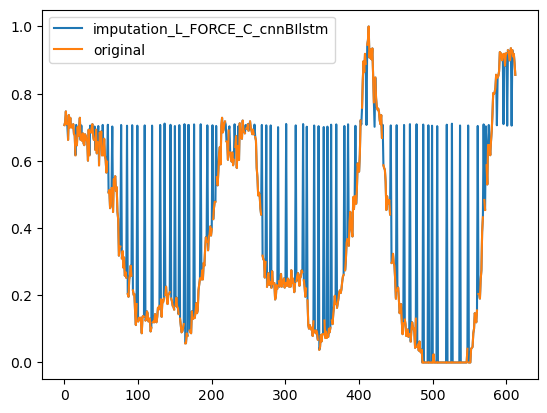

In [170]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [171]:
#[I 2023-11-12 15:03:56,569] Trial 49 finished with value: 0.08410066472293216 and parameters: {'batch_size': 31, 'steps_per_epoch': 4, 'epochs': 5676, 'filter': 191, 'lstm_par': 112, 'dense_par': 449}. Best is trial 32 with value: 0.07880370278599204.
#{'batch_size': 200, 'steps_per_epoch': 3, 'epochs': 5511, 'filter': 189, 'lstm_par': 496, 'dense_par': 384}

model = Sequential()
model.add(LSTM(496, activation='relu', input_shape=(x_train_R_FORECE_B.shape[1], 1)))
model.add(Dense(384, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 496)               988032    
                                                                 
 dense_9 (Dense)             (None, 384)               190848    
                                                                 
Total params: 1,178,880
Trainable params: 1,178,880
Non-trainable params: 0
_________________________________________________________________


In [172]:
model.fit(x_train_R_FORECE_B,y_train_L_FSR_C,epochs=5511,verbose=2,batch_size=64,steps_per_epoch=3)


Epoch 1/5511
3/3 - 0s - loss: 13.7445 - 412ms/epoch - 137ms/step
Epoch 2/5511
3/3 - 0s - loss: 5.1062 - 17ms/epoch - 6ms/step
Epoch 3/5511
3/3 - 0s - loss: 1.7495 - 16ms/epoch - 5ms/step
Epoch 4/5511
3/3 - 0s - loss: 0.9648 - 18ms/epoch - 6ms/step
Epoch 5/5511
3/3 - 0s - loss: 0.6327 - 15ms/epoch - 5ms/step
Epoch 6/5511
3/3 - 0s - loss: 0.4927 - 14ms/epoch - 5ms/step
Epoch 7/5511
3/3 - 0s - loss: 0.3910 - 15ms/epoch - 5ms/step
Epoch 8/5511
3/3 - 0s - loss: 0.2573 - 14ms/epoch - 5ms/step
Epoch 9/5511
3/3 - 0s - loss: 0.1823 - 13ms/epoch - 4ms/step
Epoch 10/5511
3/3 - 0s - loss: 0.1519 - 15ms/epoch - 5ms/step
Epoch 11/5511
3/3 - 0s - loss: 0.1297 - 15ms/epoch - 5ms/step
Epoch 12/5511
3/3 - 0s - loss: 0.1103 - 13ms/epoch - 4ms/step
Epoch 13/5511
3/3 - 0s - loss: 0.0943 - 14ms/epoch - 5ms/step
Epoch 14/5511
3/3 - 0s - loss: 0.0773 - 13ms/epoch - 4ms/step
Epoch 15/5511
3/3 - 0s - loss: 0.0698 - 13ms/epoch - 4ms/step
Epoch 16/5511
3/3 - 0s - loss: 0.0600 - 14ms/epoch - 5ms/step
Epoch 17/5511

In [173]:
pred=model.predict(x_test_L_FSR_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 0s 2ms/step


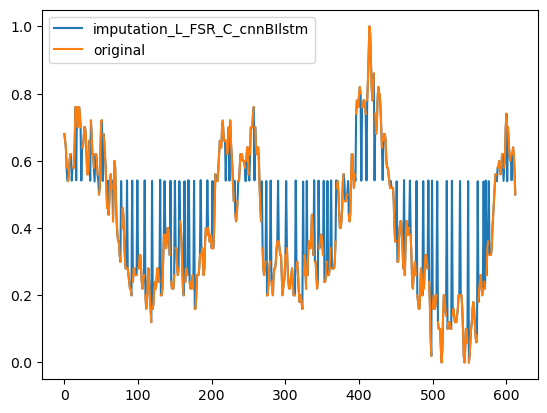

In [174]:
c=0
for i in loss_index_L_FSR_C:    
    L_FSR_C[i]=pred[c]
    c+=1
    
    
plt.plot(L_FSR_C,label='imputation_L_FSR_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [175]:
data_main.columns

Index(['FORCE_B(Right)', 'FORCE_C(Left),', 'FSR DATA_B(Right)',
       'FSR DATA_C(Left)'],
      dtype='object')

In [176]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['FSR DATA_C(Left)'],L_FSR_C))

0.15949618648579275
0.08811156762650348


In [177]:
L.isnull().sum()

FORCE_C(Left),      78
FSR DATA_C(Left)    78
dtype: int64

In [178]:
for i in loss_index_L_FORECE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FSR_C:    
    L['FSR DATA_C(Left)'][i]=L_FSR_C[i]

In [179]:
L

,"FORCE_C(Left),",FSR DATA_C(Left)
0,0.706522,0.68000
1,0.714674,0.66000
2,0.747283,0.64000
3,0.709239,0.58000
4,0.704286,0.54169
...,...,...
608,0.929348,0.62000
609,0.910326,0.64000
610,0.918478,0.62000
611,0.891304,0.56000


<Axes: >

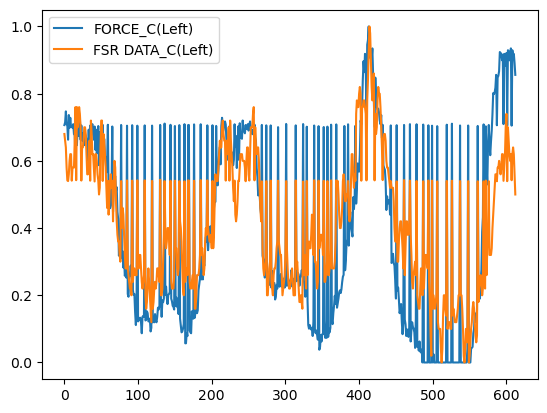

In [180]:
L=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L.plot()

<Axes: >

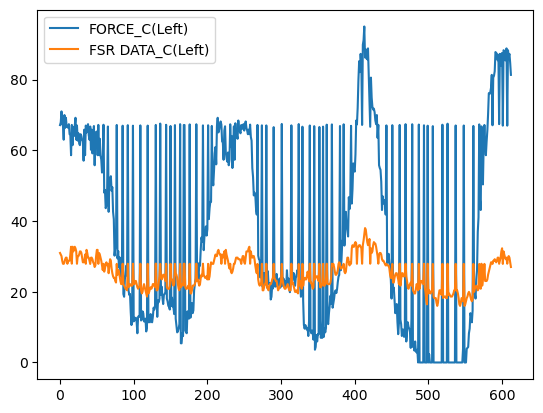

In [181]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","FSR DATA_C(Left)"],axis="columns")
L_sca.plot()